# Chapter 4: synthetic data study
# Best results JME stabilizer


<div class="alert alert-success">
    
This Notebook contains the Code to produce Figures related to the Result comparison between conventional, ME standalone inversion and JME inversion.

In [28]:
# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt
from    pygimli.physics         import ert
from    pygimli.physics         import TravelTimeManager
from    pygimli.viewer.mpl      import createColorBarOnly
from    JointEntropyClass       import JointEntropyInversion as JEI
from    PlotHelpers                 import *
from    pygimli.physics.gravimetry import GravityModelling2D


# Importing auxiliary libraries
import  numpy                   as     np
import  matplotlib.pyplot       as     plt
import  sys
import cmasher                     as cm


# Setting options
seed_val = 420
np.random.seed(seed_val)

# Filenames
fn_ert_dd  = 'Synth_ert_dd2.dat'
fn_tt      = 'Synth_tt2.dat'
fn_grav      = 'Synth_grav2.npy'

# Plotting
c_ert = 'gnuplot'
c_srt = 'viridis'
c_grav = cm.pepper

lim_ert = [5e1, 1e4]
ert_marks = [7e2, 7e3, 7e1]
ert_label = ['Layer1', 'Layer2', 'Anomaly']

lim_srt = [300, 4200]
srt_marks = [5e2, 4e3, 3e3]
srt_label = ['Layer 1', 'Layer 2', 'Anomaly']

lim_grav = [0, 800]
grav_marks = [600, 0]
grav_label = ['Anomaly', 'Half-space']

## Geometry for Comparison

(<Axes: >, None)

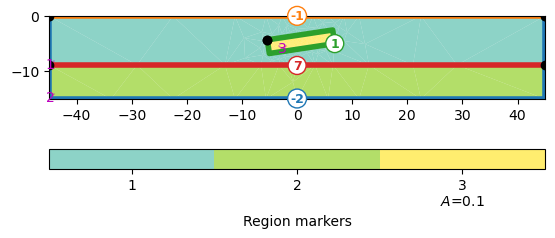

In [22]:
world = mt.createWorld(start=[-45, 0], end=[45, -15], layers=[-9],
                       marker=1)
rect = mt.createRectangle(start=[-6, -3.5], end=[6, -6.0],
                          marker=3, area=0.1)
rect.rotate([0, 0, 0.15])

geom = world + rect
pg.show(geom, markers=True)

## Data and Inversion Mesh

In [23]:
# Loading ERT
ert_data = ert.load(fn_ert_dd)
ERT = ert.ERTManager(ert_data)

# Loading SRT
tt_data = pg.physics.traveltime.load(fn_tt)
SRT = TravelTimeManager(tt_data)

grav_data = pg.Vector(np.load(fn_grav))

# inversion mesh
w = mt.createWorld([-65,-20], [65, 0])
for x in np.arange(-64,65,1):
    w.createNode([x,0])
invmesh = mt.createMesh(w,area=1.5)
extmesh = mt.appendTriangleBoundary(invmesh,xbound=100,ybound=100,marker=0)

# fig, ax = plt.subplots(1,3)
# ERT.showData(ert_data, ax=ax[0], cMap=c_ert)
# SRT.showData(tt_data, ax=ax[1], cMap=c_srt)
# pg.show(invmesh, ax=ax[2])

# Conventional

In [24]:
cz = -pg.y(invmesh.cellCenters())
z0 = 5
wz = 1 / (cz+z0)**1.5

wz = wz/np.max(wz)

In [31]:
inv.setConstraintWeights?

Signature: inv.setConstraintWeights(cWeight)
Docstring: Set weighting factors for the invidual rows of the C matrix.
File:      c:\users\azieg\anaconda3\envs\pg_1.4.3\lib\site-packages\pygimli\frameworks\inversion.py
Type:      method

In [27]:
v_est_con = SRT.invert(tt_data, mesh=invmesh, vTop=500, vBottom=4000, lam=30, secNodes=1, verbose=True, maxIter=30)
r_est_con = ERT.invert(ert_data, mesh = extmesh, lam=.5, verbose=True)

pnts_grav = np.array([np.linspace(-40,40,81) , np.zeros(81)]).T
fop = GravityModelling2D(mesh=invmesh, points=pnts_grav)
inv = pg.Inversion(fop=fop)
inv.setRegularization(limits=[-5, 800], trans="Cot")
inv.setConstraintWeights(wz)

startModel = pg.Vector(invmesh.cellCount(), 1)

d_est_con = inv.run(grav_data, absoluteError=0.001, startModel=startModel, lam=1, verbose=True, cType=1, dPhi=0.001, isReference=True)

27/07/23 - 10:33:23 - pyGIMLi - INFO - Found 1 regions.
27/07/23 - 10:33:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
27/07/23 - 10:33:23 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
27/07/23 - 10:33:23 - pyGIMLi - INFO - Create gradient starting model. 500: 4000
27/07/23 - 10:33:23 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00195586 0.00113021 0.00195586 ... 0.00026039 0.00025252 0.000274  ]
27/07/23 - 10:33:23 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001F5E87A9220>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001F5E87A9360>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001F5E87A92C0>
min/max (data): 0.0018/0.06
min/max (error): 0.96%/1.08%
min/max (start model): 2.5e-04/0.002
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 122.33 (dPhi = 83.68%) lam: 30
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 64.92 (dPhi = 46.98%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 49.97 (dPhi = 22.76%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 28.51 (dPhi = 42.62%) lam: 30.0
-----------------------------

27/07/23 - 10:34:39 - pyGIMLi - INFO - Found 2 regions.
27/07/23 - 10:34:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
27/07/23 - 10:34:39 - pyGIMLi - INFO - Creating forward mesh from region infos.


chi² = 1.05 (dPhi = 1.19%) lam: 30.0
################################################################################
#                 Abort criteria reached: dPhi = 1.19 (< 2.0%)                 #
################################################################################


27/07/23 - 10:34:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
27/07/23 - 10:34:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
27/07/23 - 10:34:39 - pyGIMLi - INFO - Use median(data values)=1604.13138414632
27/07/23 - 10:34:39 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [1604.13138414632,...,1604.13138414632]
27/07/23 - 10:34:39 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F5E87A9090>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001F5E87A9180>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001F5E87A90E0>
min/max (data): 641/2283
min/max (error): 2.5%/2.51%
min/max (start model): 1604/1604
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 50.07 (dPhi = 80.95%) lam: 2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 3.03 (dPhi = 93.67%) lam: 2.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 0.97 (dPhi = 64.96%) lam: 2.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.97)                   #
############################

27/07/23 - 10:35:39 - pyGIMLi - INFO - Starting inversion.
27/07/23 - 10:35:39 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.gravimetry.gravMagModelling.GravityModelling2D object at 0x000001F5E864C900>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001F5DFF37D60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransCotLU object at 0x000001F5A8E4E340>
min/max (data): -0.0012/0.04
min/max (error): 2.62%/4238%
min/max (start model): 1/1
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 182.62 (dPhi = 3.14%) lam: 1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 176.28 (dPhi = 3.44%) lam: 1.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 169.57 (dPhi = 3.76%) lam: 1.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 159.78 (dPhi = 5.68%) lam: 1.0
--------------------------

Text(0.5, 1.15, '    Conventional smoothness-constrained inversion')

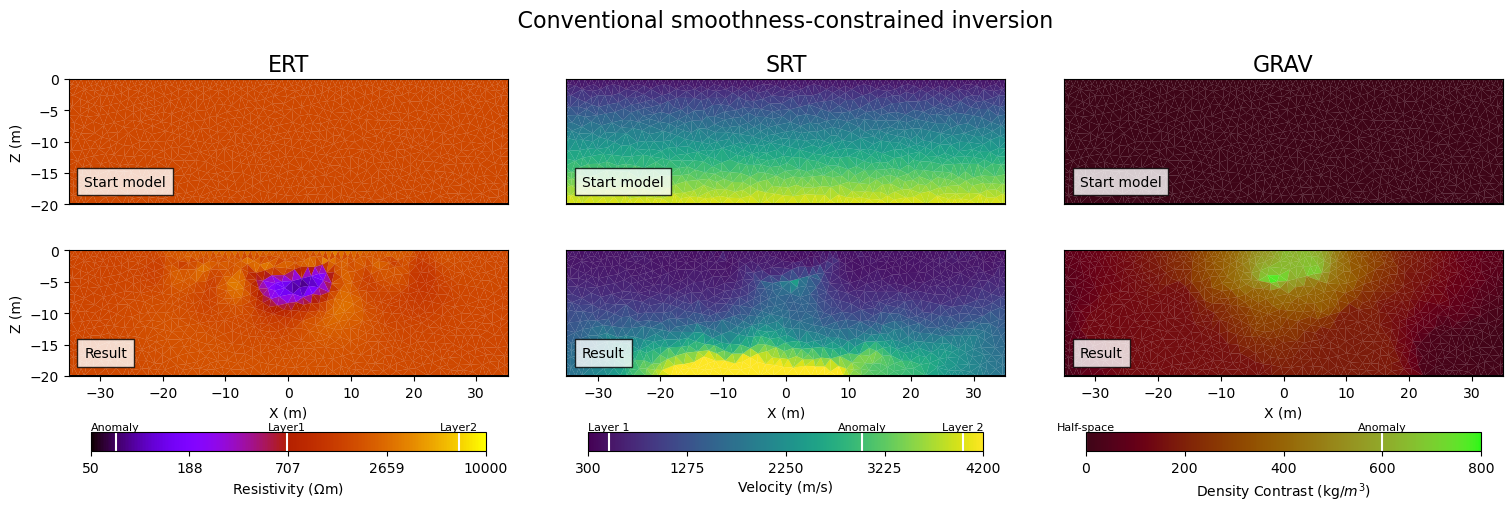

In [32]:
v_start = 1/SRT.inv.startModel
r_start = ERT.inv.startModel

fig, ax, [cax1, cax2, cax3] = plotJointResultsComparison(invmesh, [r_start, r_est_con], [v_start, v_est_con], [startModel, d_est_con],
                               c_ert, c_srt, c_grav,
                               lim_ert, lim_srt, lim_grav, label_list=['Start model', 'Result'], labels=True,
                               ert_marks=ert_marks, srt_marks=srt_marks,  grav_marks=grav_marks,
                               ert_label=ert_label, srt_label=srt_label, grav_label=grav_label, marks=True,
                               figsize=(15,3.5))

ax[0,0].set_title('ERT', fontsize=16)
ax[0,1].set_title('SRT', fontsize=16)
ax[0,2].set_title('GRAV', fontsize=16)

fig.suptitle(f'    Conventional smoothness-constrained inversion',fontsize=16, y=1.15)

# Order q=1

In [33]:
q=1
beta = 1e-10

lam_ert = 3e-3
a_ert = 15

lam_srt = 1e-2
a_srt = 90

lam_grav = 1e-4
a_grav =1

## ME

In [35]:
a = a_grav
lam = lam_grav
beta = beta

fop = GravityModelling2D(mesh=invmesh, points=pnts_grav)
inv = pg.Inversion(fop=fop)
inv.setRegularization(limits=[0.01, 800])#, trans="Cot")
inv.setConstraintWeights(wz)
GRAV = pg.frameworks.methodManager.MethodManager(fop=fop, fw=inv, data=grav_data)
        
Je = JEI(mgr_list=[GRAV], data_list=[grav_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)
        
KWe = dict(lam=lam, verbose=True, startModel=startModel)
Je.setKWInv([KWe])
Je.setNames(['GRAV'])

Je.runInversion('ME', maxIter=20, chi_limit=1)

[d_est_me] = Je.getModels()

27/07/23 - 10:45:06 - pyGIMLi - WARNING - No data error given, set Fallback set to 1%
27/07/23 - 10:45:06 - pyGIMLi - INFO - Starting inversion.
27/07/23 - 10:45:06 - pyGIMLi - INFO - Setting starting model as reference!


Starting Iteration 0...
... GRAV
fop: <pygimli.physics.gravimetry.gravMagModelling.GravityModelling2D object at 0x000001F5E9A752C0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001F5ED5E8340>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001F5ECEE74C0>
min/max (data): -0.0012/0.04
min/max (error): 1%/1%
min/max (start model): 1/1
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... 

27/07/23 - 10:45:07 - pyGIMLi - INFO - Use median(data values)=0.0028375388149290822
27/07/23 - 10:45:07 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [0.0028375388149290822,...,0.0028375388149290822]


chi² = 170780.92 (dPhi = -15.2%) lam: 0.0001
Starting iteration 1...
Set JME weights for GRAV with q=1, b=1e-10 and a=1
#####     GRAV weighted misfit chi^2   = 1066009.68
#####     stabilizing functional    S = 5.25
#####     joint weighted misfit chi^2 = 1066009.68
############################################################
       
Starting iteration 2...
Set JME weights for GRAV with q=1, b=1e-10 and a=1
#####     GRAV weighted misfit chi^2   = 616267.66
#####     stabilizing functional    S = 7.39
#####     joint weighted misfit chi^2 = 616267.66
############################################################
       
Starting iteration 3...
Set JME weights for GRAV with q=1, b=1e-10 and a=1
#####     GRAV weighted misfit chi^2   = 596356.88
#####     stabilizing functional    S = 7.66
#####     joint weighted misfit chi^2 = 596356.88
############################################################
       
Starting iteration 4...
Set JME weights for GRAV with q=1, b=1e-10 and a=1
#####   

In [ ]:
# ERT
a = a_ert
lam = lam_ert
beta = beta

ERT2 = ert.ERTManager(ert_data)
Je = JEI(mgr_list=[ERT2], data_list=[ert_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)

KWe = dict(lam=lam, verbose=False)
Je.setKWInv([KWe])
Je.setNames(['ERT'])
Je.setMethodMesh(extmesh, 0)

Je.runInversion('ME', maxIter=10, chi_limit=1)
ERT2.showResultAndFit(cMap=c_ert)

[r_est_me] = Je.getModels()


In [ ]:
# SRT
a = a_srt
lam = lam_srt
beta = beta

SRT2 = TravelTimeManager(tt_data)
Js = JEI(mgr_list=[SRT2], data_list=[tt_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)

KWs = dict(lam=lam, verbose=False, vTop=500, vBottom=1000, secNodes=1)
Js.setKWInv([KWs])
Js.setNames(['SRT'])

Js.runInversion('ME', maxIter=20, chi_limit=1.5)
SRT2.inv.model = 1/SRT2.inv.model
SRT2.showResultAndFit(cMap=c_srt)

[v_est_me] = Js.getModels()

In [ ]:
fig, ax, [cax1, cax2, cax3] = plotJointResultsComparison(invmesh, [r_est_me],  [v_est_me], [d_est_me], 
                                                   c_ert, c_srt, c_grav,
                                                   lim_ert, lim_srt, lim_grav, label_list=['Start model', 'Result'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks,  grav_marks=grav_marks,
                                                   ert_label=ert_label, srt_label=srt_label, grav_label=grav_label, marks=True,)

## JME

26/07/23 - 19:45:51 - pyGIMLi - INFO - Found 2 regions.
26/07/23 - 19:45:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
26/07/23 - 19:45:51 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/07/23 - 19:45:52 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
26/07/23 - 19:45:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368


Starting Iteration 0...
... ERT


26/07/23 - 19:45:52 - pyGIMLi - INFO - Use median(data values)=619.288890298902
26/07/23 - 19:45:52 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
26/07/23 - 19:45:52 - pyGIMLi - INFO - Setting starting model as reference!
26/07/23 - 19:46:29 - pyGIMLi - INFO - Found 1 regions.
26/07/23 - 19:46:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/07/23 - 19:46:29 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


... SRT


26/07/23 - 19:46:29 - pyGIMLi - INFO - Create gradient starting model. 500: 1000
26/07/23 - 19:46:29 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00199357 0.0018019  0.00199357 ... 0.00102333 0.00100573 0.00105268]
26/07/23 - 19:46:29 - pyGIMLi - INFO - Setting starting model as reference!
26/07/23 - 19:46:42 - pyGIMLi - WARNING - No data error given, set Fallback set to 1%
26/07/23 - 19:46:42 - pyGIMLi - INFO - Starting inversion.
26/07/23 - 19:46:42 - pyGIMLi - INFO - Setting starting model as reference!
26/07/23 - 19:46:42 - pyGIMLi - INFO - Use median(data values)=0.02094283046510902


... GRAV
fop: <pygimli.physics.gravimetry.gravMagModelling.GravityModelling2D object at 0x0000028290689EF0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000028281F5FEE0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000028281F49E80>
min/max (data): 0.0029/0.09
min/max (error): 1%/1%
min/max (start model): 1/1
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1211.26 (dPhi = 86.54%) lam: 0.0001
Starting iteration 1...


26/07/23 - 19:46:42 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [0.02094283046510902,...,0.02094283046510902]


Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=90
Set JME weights for GRAV with q=1, b=1e-10 and a=1
#####     ERT weighted misfit chi^2   = 5.03
#####     SRT weighted misfit chi^2   = 257.75
#####     GRAV weighted misfit chi^2   = 1130.12
#####     stabilizing functional    S = 74.02
#####     joint weighted misfit chi^2 = 1392.90
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=90
Set JME weights for GRAV with q=1, b=1e-10 and a=1
#####     ERT weighted misfit chi^2   = 1.36
#####     SRT weighted misfit chi^2   = 174.81
#####     GRAV weighted misfit chi^2   = 864.37
#####     stabilizing functional    S = 976.01
#####     joint weighted misfit chi^2 = 1040.54
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e

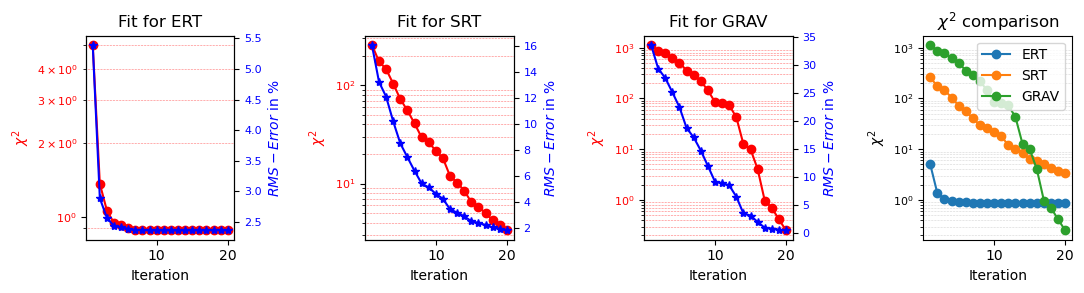

In [17]:
# Without weighting
a = [a_ert, a_srt, a_grav]
lam = [lam_ert, lam_srt, lam_grav]
beta = beta
w1 = 1 # weight ert
w2 = 1 # weight srt
w3 = 1

ERT3 = ert.ERTManager(ert_data)
SRT3 = TravelTimeManager(tt_data)
fop = GravityModelling2D(mesh=invmesh, points=pnts_grav)
inv = pg.Inversion(fop=fop)
inv.setRegularization(limits=[0, 800])#, trans="Cot")
inv.setConstraintWeights(wz)
GRAV = pg.frameworks.methodManager.MethodManager(fop=fop, fw=inv, data=grav_data)

J1 = JEI(mgr_list=[ERT3,SRT3,GRAV], data_list=[ert_data,tt_data,grav_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=1000, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
KWg = dict(lam=lam[2], verbose=True, startModel=startModel)

J1.setMethodMesh(extmesh, 0)
J1.setKWInv([KWe, KWs, KWg])
J1.setNames(['ERT','SRT', 'GRAV'])
J1.setMethodWeights([w1,w2,w3])

J1.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jme, v_est_jme, d_est_jme] = J1.getModels()
    
J1.plotFitHistory()

bla


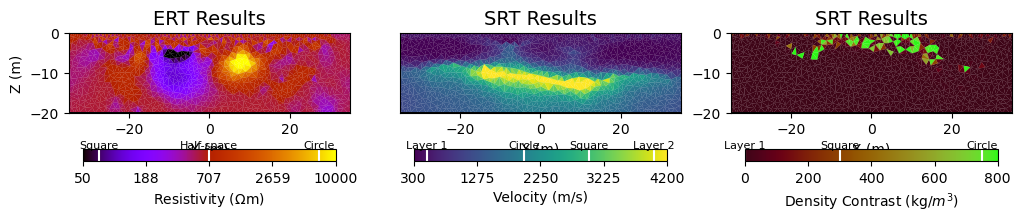

In [18]:
fig, ax, [cax1, cax2, cax3] = plotJointResultsComparison(invmesh, [r_est_jme],  [v_est_jme], [d_est_jme], 
                                                   c_ert, c_srt, c_grav,
                                                   lim_ert, lim_srt, lim_grav, label_list=['ME'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks,  grav_marks=grav_marks,
                                                   ert_label=ert_label, srt_label=srt_label, grav_label=grav_label, marks=True,)

26/07/23 - 20:03:47 - pyGIMLi - INFO - Found 2 regions.
26/07/23 - 20:03:47 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
26/07/23 - 20:03:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/07/23 - 20:03:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


26/07/23 - 20:03:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
26/07/23 - 20:03:48 - pyGIMLi - INFO - Use median(data values)=619.288890298902
26/07/23 - 20:03:48 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
26/07/23 - 20:03:48 - pyGIMLi - INFO - Setting starting model as reference!
26/07/23 - 20:04:29 - pyGIMLi - INFO - Found 1 regions.
26/07/23 - 20:04:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/07/23 - 20:04:29 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


... SRT


26/07/23 - 20:04:29 - pyGIMLi - INFO - Create gradient starting model. 500: 1000
26/07/23 - 20:04:29 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00199357 0.0018019  0.00199357 ... 0.00102333 0.00100573 0.00105268]
26/07/23 - 20:04:29 - pyGIMLi - INFO - Setting starting model as reference!
26/07/23 - 20:04:43 - pyGIMLi - WARNING - No data error given, set Fallback set to 1%
26/07/23 - 20:04:43 - pyGIMLi - INFO - Starting inversion.
26/07/23 - 20:04:43 - pyGIMLi - INFO - Setting starting model as reference!


... GRAV
fop: <pygimli.physics.gravimetry.gravMagModelling.GravityModelling2D object at 0x00000282C0AD93B0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000028281990A60>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000282C0AC08E0>
min/max (data): 0.0029/0.09
min/max (error): 1%/1%
min/max (start model): 1/1
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1211.26 (dPhi = 86.54%) lam: 0.0001
Starting iteration 1...


26/07/23 - 20:04:43 - pyGIMLi - INFO - Use median(data values)=0.02094283046510902
26/07/23 - 20:04:43 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [0.02094283046510902,...,0.02094283046510902]


Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=90
Set JME weights for GRAV with q=1, b=1e-10 and a=1
#####     ERT weighted misfit chi^2   = 4.46
#####     SRT weighted misfit chi^2   = 243.67
#####     GRAV weighted misfit chi^2   = 1130.12
#####     stabilizing functional    S = 538.33
#####     joint weighted misfit chi^2 = 1378.25
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=90
Set JME weights for GRAV with q=1, b=1e-10 and a=1
#####     ERT weighted misfit chi^2   = 2.04
#####     SRT weighted misfit chi^2   = 150.78
#####     GRAV weighted misfit chi^2   = 862.49
#####     stabilizing functional    S = 2040.59
#####     joint weighted misfit chi^2 = 1015.31
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=

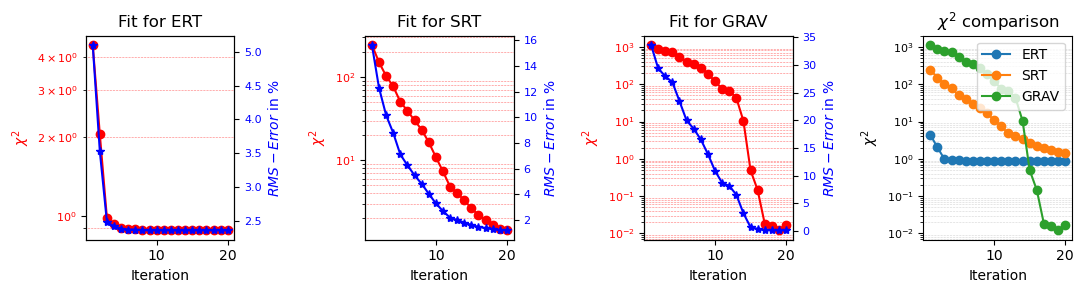

In [19]:
# With weighting
a = [a_ert, a_srt, a_grav]
lam = [lam_ert, lam_srt, lam_grav]
beta = beta
w1 = 5 # weight ert
w2 = 2 # weight srt
w3 = 1

ERT4 = ert.ERTManager(ert_data)
SRT4 = TravelTimeManager(tt_data)
fop = GravityModelling2D(mesh=invmesh, points=pnts_grav)
inv = pg.Inversion(fop=fop)
inv.setRegularization(limits=[0, 800])#, trans="Cot")
inv.setConstraintWeights(wz)
GRAV = pg.frameworks.methodManager.MethodManager(fop=fop, fw=inv, data=grav_data)

J2 = JEI(mgr_list=[ERT4,SRT4,GRAV], data_list=[ert_data,tt_data,grav_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=1000, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
KWg = dict(lam=lam[2], verbose=True, startModel=startModel)

J2.setMethodMesh(extmesh, 0)
J2.setKWInv([KWe, KWs, KWg])
J2.setNames(['ERT','SRT', 'GRAV'])
J2.setMethodWeights([w1,w2,w3])

J2.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jmew, v_est_jmew, d_est_jmew] = J2.getModels()

J2.plotFitHistory()

## Comparison Results

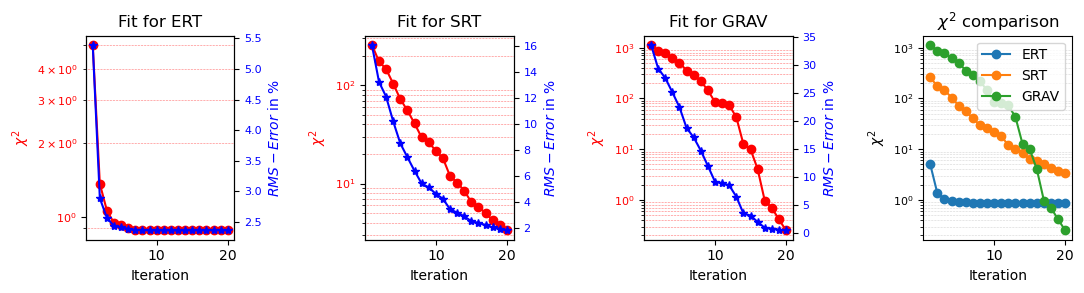

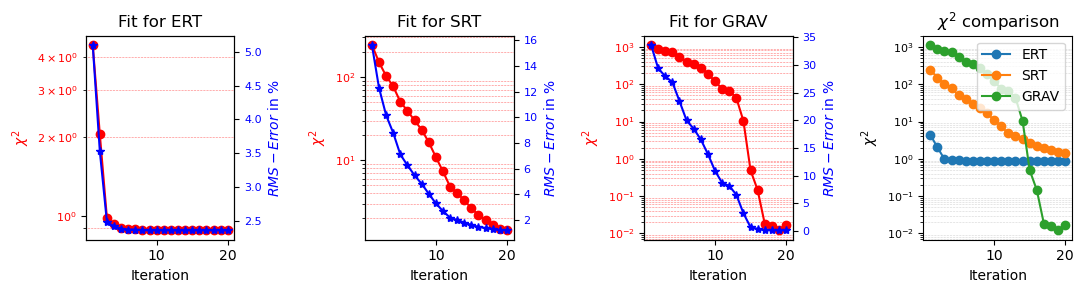

In [20]:
J1.plotFitHistory()
J2.plotFitHistory()

In [32]:
fig, ax, [cax1, cax2, cax] = plotJointResultsComparison(invmesh, 
                                                   [r_est_con, r_est_me, r_est_jme, r_est_jmew], 
                                                   [v_est_con, v_est_me, v_est_jme, 1/v_est_jmew],
                                                   [d_est_con, d_est_me, d_est_jme, d_est_jmew],
                                                   c_ert, c_srt, c_grav, lim_ert, lim_srt, lim_grav,
                                                   ['Conventional','ME','JME - no weight','JME'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, grav_marks=grav_marks, marks=True,
                                                   ert_label=ert_label, srt_label=srt_label, grav_label=grav_label,  
                                                   figsize=(15,7))
# for axis_ar in ax:
#     for axis in axis_ar:
#         pg.viewer.mpl.drawPLC(axis, geom, fillRegion=False)
#         axis.set_xlim(-35,35)
#         axis.set_ylim(-20,0)
# fig.suptitle(f'Results for q = {q}',fontsize=16, x=0.51, y=1.05)
# ax[0,0].set_title('ERT',fontsize=15)
# ax[0,1].set_title('SRT',fontsize=15)
# for a in ax[:,0]:
#     a.set_ylabel('Z (m)', fontsize=12)
#     a.set_yticks([-20,-10,0])
# for a in ax[-1,:]:
#     a.set_xlabel('X (m)', fontsize=12)
#     a.set_xticks([-20,0,20])
    
# cax1.set_xlabel(pg.unit('vel'), fontsize=12)
# cax1.tick_params(labelsize=12)
# cax2.set_xlabel(pg.unit('res'), fontsize=12)
# cax2.tick_params(labelsize=12)



In [33]:
%matplotlib qt
J2.plotWeights('ME',step=9)

## Comparison Misfit

In [23]:
lim = [-10,10] # Misfit limits
label_list = ['Conventional','ME','JME - no weight','JME - weight=[2,1]']
srt_mgrs = [SRT,SRT2,SRT3,SRT4]
ert_resp = [m.inv.response.array() for m in [ERT,ERT2,ERT3,ERT4]]

cmap='coolwarm'

fig, ax = plt.subplots(4,2, figsize=(10,10))

for i in range(4):
    # Plot misfits
    e_misfit =  100*(ert_data['rhoa'].array()-ert_resp[i])/ert_data['rhoa'].array()
    showPseudosections(ert_data, e_misfit, [0,len(ert_data['a'])], 1, ax=ax[i,0], clim=lim, cmap=cmap, Type='misfit', 
                       annotation=False, colorBar=False)
    
    showTTMatrix(srt_mgrs[i], 'misfit', ax[i,1], lim=lim, cmap=cmap, colorBar=False)
    
    # Add labels
    for axis in [ax[i,0],ax[i,1]]:
        axis.text(3, 55, label_list[i], fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

# Adjust axes
for ax_ar in ax[:-1,:]:
    for axis in ax_ar:
        axis.set_xticks([])  
        axis.set_xlabel('')

# Add colorbar
cax = ax[-1,0].inset_axes([0.2, -0.45, 1.6, 0.1])
createColorBarOnly(ax=cax, cMin=lim[0], cMax=lim[1], logScale=False,cMap=cmap,
                   label='Misfit (%)', orientation='horizontal')
cax.set_xlabel('Misfit (%)', fontsize=12)
cax.tick_params(labelsize=12)

fig.suptitle(f'Misfit for q = {q}',fontsize=16, x=.51, y=.92)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)

for a in ax[:,0]:
    a.set_ylabel('Level', fontsize=12)
    a.set_yticks([0,20,40,60])
    
for a in ax[:,1]:
    a.set_ylabel('Source Index', fontsize=12)
    
ax[-1,0].set_xlabel('Midpoint Index', fontsize=12)
ax[-1,1].set_xlabel('Sensor Index', fontsize=12)
ax[-1,1].set_xticks([0,40,80,120])
# plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/Best_misfit_comp_{q}.pdf', 
#             bbox_inches='tight',
#             dpi=600)

C:\Users\azieg\Desktop\GIT_repositories\APG-MSc-Project-Ziegon\Code\Synth_3Methods\PlotHelpers.py:308: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylab)


# Order q=2

In [24]:
q=2

## ME

In [25]:
# ERT
a = a_ert
lam = lam_ert
beta = beta

ERT2 = ert.ERTManager(ert_data)
Je = JEI(mgr_list=[ERT2], data_list=[ert_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)

KWe = dict(lam=lam, verbose=False)
Je.setKWInv([KWe])
Je.setNames(['ERT'])
Je.setMethodMesh(extmesh, 0)

Je.runInversion('ME', maxIter=10, chi_limit=1)
ERT2.showResultAndFit(cMap=c_ert)

[r_est_me] = Je.getModels()

26/07/23 - 20:20:28 - pyGIMLi - INFO - Found 2 regions.
26/07/23 - 20:20:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
26/07/23 - 20:20:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/07/23 - 20:20:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


26/07/23 - 20:20:28 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
26/07/23 - 20:20:28 - pyGIMLi - INFO - Use median(data values)=619.288890298902
26/07/23 - 20:20:28 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
26/07/23 - 20:20:28 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=15
#####     ERT weighted misfit chi^2   = 4.89
#####     stabilizing functional    S = 8.16
#####     joint weighted misfit chi^2 = 4.89
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=15
#####     ERT weighted misfit chi^2   = 1.08
#####     stabilizing functional    S = 5.75
#####     joint weighted misfit chi^2 = 1.08
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=15
#####     ERT weighted misfit chi^2   = 0.92
#####     stabilizing functional    S = 5.54
#####     joint weighted misfit chi^2 = 0.92
############################################################
       
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
          joint chi^2 < 1.00         
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
All

In [26]:
# SRT
a = a_srt
lam = lam_srt
beta = beta

SRT2 = TravelTimeManager(tt_data)
Js = JEI(mgr_list=[SRT2], data_list=[tt_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a)

KWs = dict(lam=lam, verbose=False, vTop=500, vBottom=4500, secNodes=1)
Js.setKWInv([KWs])
Js.setNames(['SRT'])

Js.runInversion('ME', maxIter=20, chi_limit=1.5)
SRT2.inv.model = 1/SRT2.inv.model
SRT2.showResultAndFit(cMap=c_srt)

[v_est_me] = Js.getModels()

26/07/23 - 20:22:39 - pyGIMLi - INFO - Found 1 regions.
26/07/23 - 20:22:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/07/23 - 20:22:39 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
26/07/23 - 20:22:39 - pyGIMLi - INFO - Create gradient starting model. 500: 4500


Starting Iteration 0...
... SRT


26/07/23 - 20:22:39 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
26/07/23 - 20:22:39 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=2, b=1e-10 and a=90
#####     SRT weighted misfit chi^2   = 175.49
#####     stabilizing functional    S = 20.56
#####     joint weighted misfit chi^2 = 175.49
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=2, b=1e-10 and a=90
#####     SRT weighted misfit chi^2   = 63.28
#####     stabilizing functional    S = 3.66
#####     joint weighted misfit chi^2 = 63.28
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=2, b=1e-10 and a=90
#####     SRT weighted misfit chi^2   = 30.38
#####     stabilizing functional    S = 21.54
#####     joint weighted misfit chi^2 = 30.38
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=2, b=1e-10 and a=90
#####     SRT weighted misfit chi^2   = 24.64
#####     stabilizing functional

## JME

In [27]:
# Without weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 1 # weight srt

ERT3 = ert.ERTManager(ert_data)
SRT3 = TravelTimeManager(tt_data)
J1 = JEI(mgr_list=[ERT3,SRT3], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=4500, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J1.setMethodMesh(extmesh, 0)
J1.setKWInv([KWe, KWs])
J1.setNames(['ERT','SRT'])
J1.setMethodWeights([w1,w2])

J1.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jme, v_est_jme] = J1.getModels()
    
# J1.plotFitHistory()

26/07/23 - 20:25:19 - pyGIMLi - INFO - Found 2 regions.
26/07/23 - 20:25:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
26/07/23 - 20:25:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/07/23 - 20:25:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


26/07/23 - 20:25:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
26/07/23 - 20:25:19 - pyGIMLi - INFO - Use median(data values)=619.288890298902
26/07/23 - 20:25:19 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
26/07/23 - 20:25:19 - pyGIMLi - INFO - Setting starting model as reference!
26/07/23 - 20:25:57 - pyGIMLi - INFO - Found 1 regions.
26/07/23 - 20:25:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/07/23 - 20:25:57 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
26/07/23 - 20:25:57 - pyGIMLi - INFO - Create gradient starting model. 500: 4500


... SRT


26/07/23 - 20:25:57 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
26/07/23 - 20:25:57 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 5.48
#####     SRT weighted misfit chi^2   = 218.54
#####     stabilizing functional    S = 3.69
#####     joint weighted misfit chi^2 = 224.02
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 1.32
#####     SRT weighted misfit chi^2   = 104.36
#####     stabilizing functional    S = 11.28
#####     joint weighted misfit chi^2 = 105.68
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 0.95
#####     SRT weighted misfit chi^2   = 49.48
#####     stabilizing fu

In [28]:
# With weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 2 # weight ert
w2 = 1 # weight srt

ERT4 = ert.ERTManager(ert_data)
SRT4 = TravelTimeManager(tt_data)
J2 = JEI(mgr_list=[ERT4,SRT4], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=4500, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J2.setMethodMesh(extmesh, 0)
J2.setKWInv([KWe, KWs])
J2.setNames(['ERT','SRT'])
J2.setMethodWeights([w1,w2])

J2.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jmew, v_est_jmew] = J2.getModels()

# J2.plotFitHistory()

26/07/23 - 20:42:36 - pyGIMLi - INFO - Found 2 regions.
26/07/23 - 20:42:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
26/07/23 - 20:42:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/07/23 - 20:42:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


26/07/23 - 20:42:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
26/07/23 - 20:42:36 - pyGIMLi - INFO - Use median(data values)=619.288890298902
26/07/23 - 20:42:36 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
26/07/23 - 20:42:36 - pyGIMLi - INFO - Setting starting model as reference!
26/07/23 - 20:43:17 - pyGIMLi - INFO - Found 1 regions.
26/07/23 - 20:43:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/07/23 - 20:43:17 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


... SRT


26/07/23 - 20:43:17 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
26/07/23 - 20:43:17 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
26/07/23 - 20:43:17 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 5.12
#####     SRT weighted misfit chi^2   = 223.07
#####     stabilizing functional    S = 4.16
#####     joint weighted misfit chi^2 = 228.19
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 1.28
#####     SRT weighted misfit chi^2   = 73.42
#####     stabilizing functional    S = 10.02
#####     joint weighted misfit chi^2 = 74.70
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=2, b=1e-10 and a=15
Set JME weights for SRT with q=2, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 0.93
#####     SRT weighted misfit chi^2   = 40.16
#####     stabilizing func

## Comparison Results

In [29]:
# J1.plotFitHistory()
# plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/Conv_JME_{q}.pdf', 
#             bbox_inches='tight',
#             dpi=600)
# J2.plotFitHistory()
# plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/Conv_JMEweighted_{q}.pdf', 
#             bbox_inches='tight',
#             dpi=600)

In [30]:
lim = [-10,10] # Misfit limits
label_list = ['Conventional','ME','JME - no weight','JME - weight=[2,1]']
srt_mgrs = [SRT,SRT2,SRT3,SRT4]
ert_resp = [m.inv.response.array() for m in [ERT,ERT2,ERT3,ERT4]]

cmap='coolwarm'

fig, ax = plt.subplots(4,2, figsize=(10,10))

for i in range(4):
    # Plot misfits
    e_misfit =  100*(ert_data['rhoa'].array()-ert_resp[i])/ert_data['rhoa'].array()
    showPseudosections(ert_data, e_misfit, [0,len(ert_data['a'])], 1, ax=ax[i,0], clim=lim, cmap=cmap, Type='misfit', 
                       annotation=False, colorBar=False)
    
    showTTMatrix(srt_mgrs[i], 'misfit', ax[i,1], lim=lim, cmap=cmap, colorBar=False)
    
    # Add labels
    for axis in [ax[i,0],ax[i,1]]:
        axis.text(3, 55, label_list[i], fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

# Adjust axes
for ax_ar in ax[:-1,:]:
    for axis in ax_ar:
        axis.set_xticks([])  
        axis.set_xlabel('')

# Add colorbar
cax = ax[-1,0].inset_axes([0.2, -0.45, 1.6, 0.1])
createColorBarOnly(ax=cax, cMin=lim[0], cMax=lim[1], logScale=False,cMap=cmap,
                   label='Misfit (%)', orientation='horizontal')
cax.set_xlabel('Misfit (%)', fontsize=12)
cax.tick_params(labelsize=12)

fig.suptitle(f'Misfit for q = {q}',fontsize=16, x=.51, y=.92)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)

for a in ax[:,0]:
    a.set_ylabel('Level', fontsize=12)
    a.set_yticks([0,20,40,60])
    
for a in ax[:,1]:
    a.set_ylabel('Source Index', fontsize=12)
    
ax[-1,0].set_xlabel('Midpoint Index', fontsize=12)
ax[-1,1].set_xlabel('Sensor Index', fontsize=12)
ax[-1,1].set_xticks([0,40,80,120])
# plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/Best_misfit_comp_{q}.pdf', 
#             bbox_inches='tight',
#             dpi=600)

In [31]:
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, 
                                                   [r_est_con, r_est_me,r_est_jme,r_est_jmew], 
                                                   [v_est_con, v_est_me,v_est_jme,1/v_est_jmew], 
                                                   c_ert, c_srt, lim_ert, lim_srt, 
                                                   ['Conventional','ME','JME - no weight','JME - weight=[2,1]'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True, 
                                                   figsize=(10,7))
for axis_ar in ax:
    for axis in axis_ar:
        pg.viewer.mpl.drawPLC(axis, geom, fillRegion=False)
        axis.set_xlim(-35,35)
        axis.set_ylim(-20,0)
fig.suptitle(f'Results for q = {q}',fontsize=16, x=0.51, y=1.05)
ax[0,0].set_title('ERT',fontsize=15)
ax[0,1].set_title('SRT',fontsize=15)
for a in ax[:,0]:
    a.set_ylabel('Z (m)', fontsize=12)
    a.set_yticks([-20,-10,0])
for a in ax[-1,:]:
    a.set_xlabel('X (m)', fontsize=12)
    a.set_xticks([-20,0,20])
    
cax1.set_xlabel(pg.unit('vel'), fontsize=12)
cax1.tick_params(labelsize=12)
cax2.set_xlabel(pg.unit('res'), fontsize=12)
cax2.tick_params(labelsize=12)
# plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/Best_results_comp_{q}.pdf', 
#             bbox_inches='tight',
#             dpi=600)

TypeError: plotJointResultsComparison() missing 3 required positional arguments: 'lim_srt', 'lim_grav', and 'label_list'